### 1️⃣ Introduction — 🔍 What is Unsupervised Learning?
# 🎯 Overview
**Unsupervised learning** is a type of machine learning where the model learns patterns or structure from **unlabeled data** (\(X\) only, no \(y\)).  

Key goals:
- **Clustering:** grouping similar data points together.  
- **Dimensionality reduction:** compressing data while preserving structure.  
- **Density estimation / anomaly detection:** finding unusual points.  

**Key difference from supervised learning:** no labeled output. Model discovers hidden patterns automatically.

---

**Examples:**
- Customer segmentation (clustering).  
- Market basket analysis (association rules).  
- Anomaly detection in transactions.  
- Reducing features for visualization (PCA, t-SNE).


### 2️⃣ Types of Unsupervised Learning Algorithms 🧠

1. **Clustering** — grouping similar data points:
   - K-Means
   - Hierarchical Clustering
   - DBSCAN
   - Gaussian Mixture Models (GMM)

2. **Dimensionality Reduction / Feature Extraction**:
   - PCA (Principal Component Analysis)
   - t-SNE (t-distributed Stochastic Neighbor Embedding)
   - UMAP

3. **Density Estimation / Anomaly Detection**:
   - One-Class SVM
   - Isolation Forest
   - Kernel Density Estimation (KDE)

4. **Association Rules**:
   - Apriori
   - FP-Growth


### 3️⃣ K-Means Clustering — Theory & Math 🔢

**Goal:** partition $n$ data points into $K$ clusters $\{C_1, C_2, ..., C_K\}$ minimizing intra-cluster variance.

**Objective function (to minimize):**

$$
J = \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$

where $\mu_k$ is the centroid of cluster $C_k$.

**Step-by-step algorithm:**

1. Initialize $K$ centroids randomly.  
2. Assign each point $x_i$ to nearest centroid:

$$
\text{assign } x_i \text{ to cluster } k = \arg\min_j \| x_i - \mu_j \|^2
$$

3. Update centroid of each cluster:

$$
\mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
$$

4. Repeat steps 2–3 until centroids converge or maximum iterations are reached.


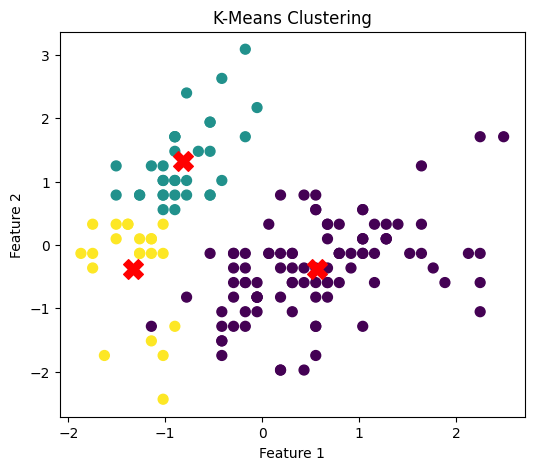

In [1]:
### 4️⃣ K-Means Clustering — Example (Iris dataset)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data
X, _ = load_iris(return_X_y=True)
X_scaled = StandardScaler().fit_transform(X)

# Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Plot clusters
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### 5️⃣ K-Means from scratch — Step-by-step 🛠️

**Class implementation:**

- Initialize centroids  
- Assign points  
- Update centroids  
- Repeat until convergence

**Equation reminders:**

$$
\text{assign } x_i \text{ to } k = \arg\min_j \| x_i - \mu_j \|^2
$$

$$
\mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
$$


In [2]:
### 6️⃣ K-Means from scratch
class KMeansScratch:
    def __init__(self, n_clusters=3, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        # Randomly initialize centroids
        np.random.seed(42)
        random_idx = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.centroids = X[random_idx]
        
        for i in range(self.max_iter):
            # Assign clusters
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels_ = np.argmin(distances, axis=1)
            
            # Update centroids
            new_centroids = np.array([X[self.labels_ == k].mean(axis=0) for k in range(self.n_clusters)])
            
            # Check convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# Test scratch implementation
km_scratch = KMeansScratch(n_clusters=3)
km_scratch.fit(X_scaled)
y_scratch = km_scratch.predict(X_scaled)


### 7️⃣ Hierarchical Clustering — Agglomerative 🔗

**Goal:** build a hierarchy of clusters (tree / dendrogram).

**Steps:**
1. Start with each point as its own cluster.  
2. Find the closest pair of clusters and merge them.  
3. Repeat until all points merge into one cluster.  

**Distance linkage methods:**
- Single: distance between closest points  
- Complete: distance between farthest points  
- Average: average pairwise distance

**Visual:** Dendrogram — shows merges at each step.


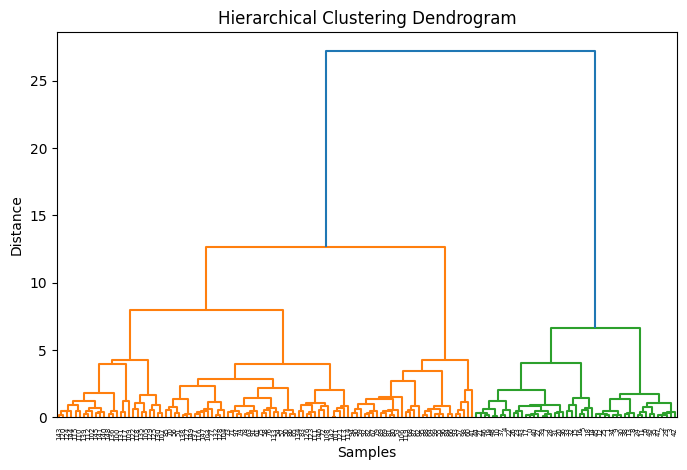

In [3]:
### 8️⃣ Hierarchical Clustering Example
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_scaled, 'ward')  # Ward minimizes variance within clusters

plt.figure(figsize=(8,5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


### 9️⃣ DBSCAN — Density-Based Clustering 🌌

**Idea:** clusters are dense regions separated by sparse regions.

**Parameters:**
- `eps`: neighborhood radius  
- `min_samples`: minimum points to form a dense region

**Steps:**
1. For each point, find neighbors within `eps`.  
2. If neighbors ≥ `min_samples`, start a cluster.  
3. Expand cluster by recursively adding reachable points.  
4. Points not reachable from any cluster are labeled as noise (-1).

**Pros:** Can detect arbitrary shape clusters, robust to noise.  
**Cons:** Choosing `eps` and `min_samples` can be tricky.


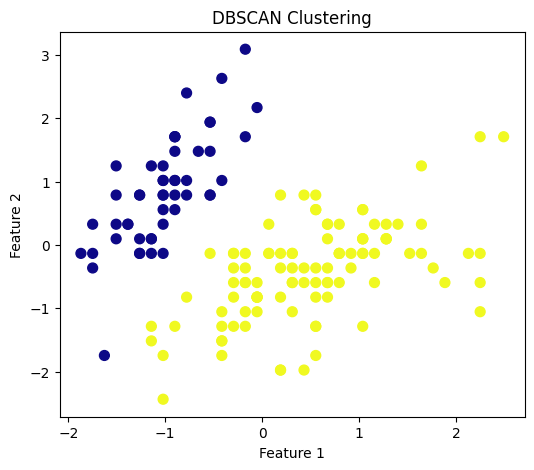

In [4]:
### 10️⃣ DBSCAN Example
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_dbscan, cmap='plasma', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### 11️⃣ PCA — Principal Component Analysis 📉

**Goal:** reduce dimensionality while preserving variance.

**Steps / Math:**

1. Center the data:

$$
X_{centered} = X - \bar{X}
$$

2. Compute covariance matrix:

$$
\Sigma = \frac{1}{n-1} X_{centered}^T X_{centered}
$$

3. Eigen decomposition:

$$
\Sigma v = \lambda v
$$

4. Select top $k$ eigenvectors → principal components  

5. Transform data:

$$
X_{reduced} = X_{centered} \cdot V_k
$$

**Applications:** visualization, noise reduction, preprocessing.


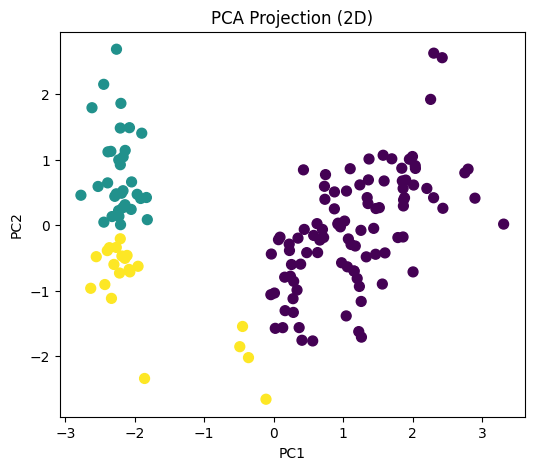

In [5]:
### 12️⃣ PCA Example
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_kmeans, cmap='viridis', s=50)
plt.title('PCA Projection (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


### 13️⃣ Summary & Best Practices ✅
- **K-Means:** simple, fast, assumes spherical clusters.  
- **Hierarchical:** dendrograms, good for small datasets.  
- **DBSCAN:** detects arbitrary shapes, handles noise.  
- **PCA:** dimensionality reduction, visualization, preprocessing.  

**Tips:**
- Scale features before clustering.  
- Use silhouette score, Davies-Bouldin, or Calinski-Harabasz for cluster validation.  
- Visualize whenever possible.  
- Try multiple algorithms — unsupervised learning has no “true labels” to guarantee performance.
